Violence and racism against Asians have increased drastically during the Covid-19 pandemic. It is important for people to understand the severity of this issue and address the problem.
For this project, I am going to find the best subway stations for the Stop Asian Hate organization to raise awareness for violence against AAPI community and provide outreach for the AAPI community.

In [ ]:
# Downloading the data from MTA website

import urllib.request

url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
week_nums = [210320, 210313, 210306, 210227, 210220, 210213, 210206, 210130, 210116,
210109, 210109, 210102, 201226, 201219, 201212, 201205, 201128, 201121, 201114, 201107, 201031, 201024, 201017, 201010]

for week_num in week_nums:
    urllib.request.urlretrieve(f"http://web.mta.info/developers/data/nyct/turnstile/turnstile_{week_num}.txt",
                               f"MTA Project/turnstile_{week_num}.txt")
    
    
    


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

In [2]:
#create local database
from sqlalchemy import create_engine
engine = create_engine('sqlite:///mta_6months.db')

In [3]:
# read in the data
t1010_data = pd.read_sql('SELECT * FROM turnstile_201010;', engine)
t1017_data = pd.read_sql('SELECT * FROM turnstile_201017;', engine)
t1024_data = pd.read_sql('SELECT * FROM turnstile_201024;', engine)
t1031_data = pd.read_sql('SELECT * FROM turnstile_201031;', engine)
t1107_data = pd.read_sql('SELECT * FROM turnstile_201107;', engine)
t1114_data = pd.read_sql('SELECT * FROM turnstile_201114;', engine)
t1121_data = pd.read_sql('SELECT * FROM turnstile_201121;', engine)
t1128_data = pd.read_sql('SELECT * FROM turnstile_201128;', engine)
t1205_data = pd.read_sql('SELECT * FROM turnstile_201205;', engine)
t1212_data = pd.read_sql('SELECT * FROM turnstile_201212;', engine)
t1219_data = pd.read_sql('SELECT * FROM turnstile_201219;', engine)
t1226_data = pd.read_sql('SELECT * FROM turnstile_201226;', engine)
t130_data = pd.read_sql('SELECT * FROM turnstile_210130;', engine)
t102_data = pd.read_sql('SELECT * FROM turnstile_210102;', engine)
t109_data = pd.read_sql('SELECT * FROM turnstile_210109;', engine)
t116_data = pd.read_sql('SELECT * FROM turnstile_210116;', engine)
t123_data = pd.read_sql('SELECT * FROM turnstile_210123;', engine)
t206_data = pd.read_sql('SELECT * FROM turnstile_210206;', engine)
t213_data = pd.read_sql('SELECT * FROM turnstile_210213;', engine)
t220_data = pd.read_sql('SELECT * FROM turnstile_210220;', engine)
t227_data = pd.read_sql('SELECT * FROM turnstile_210227;', engine)
t306_data = pd.read_sql('SELECT * FROM turnstile_210306;', engine)
t313_data = pd.read_sql('SELECT * FROM turnstile_210313;', engine)
t320_data = pd.read_sql('SELECT * FROM turnstile_210320;', engine)

In [4]:
# t102 has one column (EXITS) that has a lot of trailing white space so it adds an extra column when concatenated 
# removing trailing white space prior to concatenation 

t102_data.columns = t102_data.columns.str.strip()

In [5]:
#Concatenating 24 weeks of data
tables = [t1010_data, t1017_data, t1024_data, t1031_data, t1107_data, t1114_data, t1121_data, t1128_data, t1205_data, t1212_data, t1219_data, t1226_data, t102_data, t109_data, t116_data, t123_data, t130_data, t206_data, t213_data, t220_data, t227_data,
         t306_data, t313_data, t320_data]
mta = pd.concat(tables)

In [6]:
# examine first few rows of data

mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/03/2020,00:00:00,REGULAR,7466548,2539998
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/03/2020,04:00:00,REGULAR,7466548,2539999
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/03/2020,08:00:00,REGULAR,7466561,2540021
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/03/2020,12:00:00,REGULAR,7466604,2540070
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/03/2020,16:00:00,REGULAR,7466736,2540105


In [7]:
#check columns
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [8]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5036872 entries, 0 to 207053
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 461.1+ MB


In [9]:
# Adding a new column with converted Date and Time columns to datetime 
import datetime

mta['date_time'] = pd.to_datetime(mta['DATE'] + ' ' + mta['TIME'], format = '%m/%d/%Y %H:%M:%S')
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/03/2020,00:00:00,REGULAR,7466548,2539998,2020-10-03 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/03/2020,04:00:00,REGULAR,7466548,2539999,2020-10-03 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/03/2020,08:00:00,REGULAR,7466561,2540021,2020-10-03 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/03/2020,12:00:00,REGULAR,7466604,2540070,2020-10-03 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/03/2020,16:00:00,REGULAR,7466736,2540105,2020-10-03 16:00:00


In [10]:
# Checking for duplicates
(mta
 .groupby(["C/A", "UNIT", "SCP", "STATION", "LINENAME", "date_time"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(20)

,C/A,UNIT,SCP,STATION,LINENAME,date_time,ENTRIES
1544145,N100,R252,00-00-00,HIGH ST,AC,2021-03-08 11:00:00,2
3494664,R162,R166,00-00-00,79 ST,1,2020-12-30 00:00:00,2
3393419,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,2021-02-02 03:00:00,2
3393418,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,2021-02-01 23:00:00,2
3393417,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,2021-02-01 19:00:00,2
3393416,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,2021-02-01 15:00:00,2
3393415,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,2021-02-01 11:00:00,2
3393413,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,2021-02-01 07:00:00,2
3393412,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,2021-02-01 03:00:00,2
3393411,R145,R032,00-00-02,TIMES SQ-42 ST,1237ACENQRSW,2021-01-31 23:00:00,2


In [11]:
# Taking a closer look at the duplicates 

mask = ((mta["C/A"] == "N100") & 
(mta["UNIT"] == "R252") & 
(mta["SCP"] == "00-00-00") & 
(mta["STATION"] == "HIGH ST") &
(mta["date_time"].dt.date == datetime.datetime(2021, 3, 6).date()))

mta[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time
64165,N100,R252,00-00-00,HIGH ST,AC,IND,03/06/2021,03:00:00,REGULAR,816719,1728050,2021-03-06 03:00:00
64166,N100,R252,00-00-00,HIGH ST,AC,IND,03/06/2021,03:00:00,RECOVR AUD,818272,1731687,2021-03-06 03:00:00
64167,N100,R252,00-00-00,HIGH ST,AC,IND,03/06/2021,07:00:00,REGULAR,816722,1728063,2021-03-06 07:00:00
64168,N100,R252,00-00-00,HIGH ST,AC,IND,03/06/2021,07:00:00,RECOVR AUD,818272,1731687,2021-03-06 07:00:00
64169,N100,R252,00-00-00,HIGH ST,AC,IND,03/06/2021,11:00:00,REGULAR,816762,1728271,2021-03-06 11:00:00


In [12]:
# Duplicates are abnormally high and then the next entry is a more reasonable count so I will drop the duplicates.
mta.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "LINENAME", "date_time"], inplace=True)

In [13]:
# Sanity check

(mta
 .groupby(["C/A", "UNIT", "SCP", "STATION", "LINENAME", "date_time"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,LINENAME,date_time,ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,2020-10-03 00:00:00,1
3357858,R138,R293,00-03-01,34 ST-PENN STA,123ACE,2020-12-13 17:00:00,1
3357865,R138,R293,00-03-01,34 ST-PENN STA,123ACE,2020-12-14 21:00:00,1
3357864,R138,R293,00-03-01,34 ST-PENN STA,123ACE,2020-12-14 17:00:00,1
3357863,R138,R293,00-03-01,34 ST-PENN STA,123ACE,2020-12-14 13:00:00,1
3357862,R138,R293,00-03-01,34 ST-PENN STA,123ACE,2020-12-14 09:00:00,1
3357861,R138,R293,00-03-01,34 ST-PENN STA,123ACE,2020-12-14 05:00:00,1
3357860,R138,R293,00-03-01,34 ST-PENN STA,123ACE,2020-12-14 01:00:00,1
3357859,R138,R293,00-03-01,34 ST-PENN STA,123ACE,2020-12-13 21:00:00,1
3357857,R138,R293,00-03-01,34 ST-PENN STA,123ACE,2020-12-13 13:00:00,1


In [14]:
# Don't need Exits and Desc columns so will go ahead and drop them
mta = mta.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [15]:
# Convert date column to datetime object

mta['DATE'] = pd.to_datetime(mta['DATE'])

In [16]:
#sanity check

mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5036791 entries, 0 to 207053
Data columns (total 10 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       datetime64[ns]
 7   TIME       object        
 8   ENTRIES    int64         
 9   date_time  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(7)
memory usage: 422.7+ MB


In [17]:
# Maximum cumulative entries of each day grouped by date

mta_daily = mta.groupby(["C/A", "UNIT", "SCP", "STATION", "LINENAME", "DATE"],as_index=False).ENTRIES.first()

In [18]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,2020-10-03,7466548
1,A002,R051,02-00-00,59 ST,NQR456W,2020-10-04,7466956
2,A002,R051,02-00-00,59 ST,NQR456W,2020-10-05,7467242
3,A002,R051,02-00-00,59 ST,NQR456W,2020-10-06,7467851
4,A002,R051,02-00-00,59 ST,NQR456W,2020-10-07,7468390


In [19]:
# Create columns for previous day and entries

mta_daily[["PREV_DATE", "PREV_ENTRIES"]] = (mta_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION", "LINENAME"])[["DATE", "ENTRIES"]]
                                                       .apply(lambda x: x.shift(1)))

In [20]:
mta_daily.head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,NQR456W,2020-10-03,7466548,NaT,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,2020-10-04,7466956,2020-10-03,7466548.0
2,A002,R051,02-00-00,59 ST,NQR456W,2020-10-05,7467242,2020-10-04,7466956.0
3,A002,R051,02-00-00,59 ST,NQR456W,2020-10-06,7467851,2020-10-05,7467242.0
4,A002,R051,02-00-00,59 ST,NQR456W,2020-10-07,7468390,2020-10-06,7467851.0


In [21]:
# Drop the earliest date row 

mta_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [22]:
# Checking for inconsistencies in dataset

mta_daily[mta_daily['ENTRIES'] < mta_daily['PREV_ENTRIES']].head()

,C/A,UNIT,SCP,STATION,LINENAME,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
6550,A011,R080,01-03-00,57 ST-7 AV,NQRW,2020-10-04,885648762,2020-10-03,885648903.0
6551,A011,R080,01-03-00,57 ST-7 AV,NQRW,2020-10-05,885648653,2020-10-04,885648762.0
6552,A011,R080,01-03-00,57 ST-7 AV,NQRW,2020-10-06,885648470,2020-10-05,885648653.0
6553,A011,R080,01-03-00,57 ST-7 AV,NQRW,2020-10-07,885648250,2020-10-06,885648470.0
6554,A011,R080,01-03-00,57 ST-7 AV,NQRW,2020-10-08,885647949,2020-10-07,885648250.0


In [23]:
# Some of the turnstile counters have more entries than the next day. How many counters have this problem?
mta_daily[mta_daily['ENTRIES'] < mta_daily['PREV_ENTRIES']].count()

C/A             7488
UNIT            7488
SCP             7488
STATION         7488
LINENAME        7488
DATE            7488
ENTRIES         7488
PREV_DATE       7488
PREV_ENTRIES    7488
dtype: int64

In [24]:
# There are 7488 turnstile counters that have more entries than the day after. Investigating further.

mask = ((mta["C/A"] == "A011") & 
(mta["UNIT"] == "R080") & 
(mta["SCP"] == "01-03-00") & 
(mta["STATION"] == "57 ST-7 AV") &
(mta["date_time"].dt.date == datetime.date(2020, 12, 27)))


In [25]:
# The counter is decreasing instead of increasing throughout the day

def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# Using 60000 as the limit for max counter (around 40 people per minute so total should be not more than 60000 per day)
# Just set it to zero as different counters have different cycle limits

mta_daily["DAILY_ENTRIES"] = mta_daily.apply(get_daily_counts, axis=1, max_counter=60000)

In [26]:
# Calculating the daily entries for each station

station_daily = mta_daily.groupby(["STATION", "LINENAME", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,LINENAME,DATE,DAILY_ENTRIES
0,1 AV,L,2020-10-04,5331.0
1,1 AV,L,2020-10-05,3904.0
2,1 AV,L,2020-10-06,6281.0
3,1 AV,L,2020-10-07,6627.0
4,1 AV,L,2020-10-08,6630.0


In [27]:
# Sorting to find the station with the most entries by date
station_daily.sort_values(by='DAILY_ENTRIES', ascending=False)

,STATION,LINENAME,DATE,DAILY_ENTRIES
67437,PATH NEW WTC,1,2021-01-14,103887.0
61196,METS-WILLETS PT,7,2020-11-11,76210.0
14962,34 ST-HERALD SQ,BDFMNQRW,2020-11-20,72285.0
67375,PATH NEW WTC,1,2020-11-13,67726.0
17200,42 ST-PORT AUTH,ACENQRS1237W,2021-01-26,64959.0
...,...,...,...,...
32188,BAY PKWY,F,2020-12-20,0.0
32189,BAY PKWY,F,2020-12-21,0.0
32209,BAY PKWY,F,2021-01-10,0.0
32210,BAY PKWY,F,2021-01-11,0.0


In [28]:
# Which station has the highest volume over the last 6 months?

station_totals = station_daily.groupby(['STATION', 'LINENAME']).sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head()

,STATION,LINENAME,DAILY_ENTRIES
0,34 ST-HERALD SQ,BDFMNQRW,3992910.0
1,GRD CNTRL-42 ST,4567S,3313833.0
2,FLUSHING-MAIN,7,3062143.0
3,42 ST-PORT AUTH,ACENQRS1237W,2994632.0
4,JKSN HT-ROOSVLT,EFMR7,2827110.0


In [29]:
# top 10 busiest stations

top10_stations = station_totals.head(10)

In [30]:
top10_stations

,STATION,LINENAME,DAILY_ENTRIES
0,34 ST-HERALD SQ,BDFMNQRW,3992910.0
1,GRD CNTRL-42 ST,4567S,3313833.0
2,FLUSHING-MAIN,7,3062143.0
3,42 ST-PORT AUTH,ACENQRS1237W,2994632.0
4,JKSN HT-ROOSVLT,EFMR7,2827110.0
5,34 ST-PENN STA,ACE,2381659.0
6,14 ST-UNION SQ,LNQR456W,2063043.0
7,PATH NEW WTC,1,2013856.0
8,59 ST COLUMBUS,ABCD1,1889854.0
9,86 ST,456,1848812.0


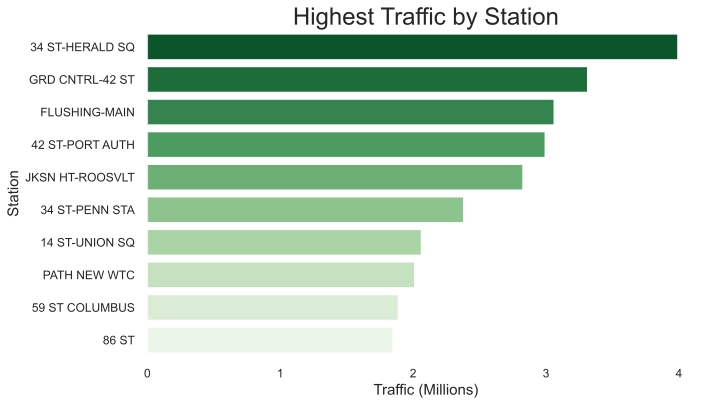

In [35]:

%config InlineBackend.figure_format = 'svg'
sns.set_style("white", )
sns.set_context("talk")
plt.figure(figsize=(10,6), dpi=1200)
g=sns.barplot(x='DAILY_ENTRIES', y='STATION', data=top10_stations, palette="Greens_r")

plt.xticks(range(0,5000000, 1000000))
g.set_xticklabels([0,1,2,3,4], size=12)

plt.xlabel("Traffic (Millions)", size=15)

plt.ylabel('Station', size=15)

plt.title("Highest Traffic by Station", size=24, loc='center')
plt.yticks(fontsize=12)

sns.despine(left=True, bottom=True)


The top ten busiest stations should be a good starting point to see where the organization could reach the most people. So what time should they set up the street teams?

In [37]:
# Copy mta dataframe for calculating time intervals
mta_time = mta.copy()

In [38]:
# indexes are duplicated so cannot use .shift() method
mta_time[mta_time.index.duplicated()]


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-10,00:00:00,7470170,2020-10-10 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-10,04:00:00,7470174,2020-10-10 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-10,08:00:00,7470187,2020-10-10 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-10,12:00:00,7470222,2020-10-10 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-10,16:00:00,7470348,2020-10-10 16:00:00
...,...,...,...,...,...,...,...,...,...,...
207049,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-19,05:00:00,5554,2021-03-19 05:00:00
207050,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-19,09:00:00,5554,2021-03-19 09:00:00
207051,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-19,13:00:00,5554,2021-03-19 13:00:00
207052,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-19,17:00:00,5554,2021-03-19 17:00:00


In [39]:

# number of rows with duplicated indices
mta_time[mta_time.index.duplicated()].count()

C/A          4823686
UNIT         4823686
SCP          4823686
STATION      4823686
LINENAME     4823686
DIVISION     4823686
DATE         4823686
TIME         4823686
ENTRIES      4823686
date_time    4823686
dtype: int64

In [40]:
# Reset index
mta_time = mta_time.reset_index()

In [41]:
#sanity check
mta_time[mta_time.index.duplicated()]

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,date_time


In [42]:
# Create columns for previous time and entries

mta_time[["PREV_TIME", "PREV_ENTRIES"]] = (mta_time.groupby(["C/A", "UNIT", "SCP", "STATION", "LINENAME"])[["date_time", "ENTRIES"]]
                                      .apply(lambda x: x.shift(1)))

In [43]:
mta_time.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,date_time,PREV_TIME,PREV_ENTRIES
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,00:00:00,7466548,2020-10-03 00:00:00,NaT,NaN
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,04:00:00,7466548,2020-10-03 04:00:00,2020-10-03 00:00:00,7466548.0
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,08:00:00,7466561,2020-10-03 08:00:00,2020-10-03 04:00:00,7466548.0
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,12:00:00,7466604,2020-10-03 12:00:00,2020-10-03 08:00:00,7466561.0
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,16:00:00,7466736,2020-10-03 16:00:00,2020-10-03 12:00:00,7466604.0


In [44]:
#drop row with NAN

mta_time.dropna(subset=["PREV_TIME"], axis=0, inplace=True)

In [45]:
# Use the previous function to get the entries per time interval

def get_interval_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        
        counter = -counter
    if counter > max_counter:
         
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        
        return 0
    return counter

# Using 10000 as the limit for max counter (around 40 people per minute so total should be not more than 10000 per time interval)
# Just set it to zero as different counters have different cycle limits

mta_time["INTERVAL_ENTRIES"] = mta_time.apply(get_interval_counts, axis=1, max_counter=10000)

In [46]:
mta_time.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,date_time,PREV_TIME,PREV_ENTRIES,INTERVAL_ENTRIES
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,04:00:00,7466548,2020-10-03 04:00:00,2020-10-03 00:00:00,7466548.0,0.0
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,08:00:00,7466561,2020-10-03 08:00:00,2020-10-03 04:00:00,7466548.0,13.0
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,12:00:00,7466604,2020-10-03 12:00:00,2020-10-03 08:00:00,7466561.0,43.0
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,16:00:00,7466736,2020-10-03 16:00:00,2020-10-03 12:00:00,7466604.0,132.0
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,20:00:00,7466887,2020-10-03 20:00:00,2020-10-03 16:00:00,7466736.0,151.0


In [47]:
# Drop PREV_TIME and PREV_ENTRIES columns since we're not going to use them 
mta_time = mta_time.drop(columns=['PREV_TIME', 'PREV_ENTRIES'])

In [48]:
mta_time

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,date_time,INTERVAL_ENTRIES
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,04:00:00,7466548,2020-10-03 04:00:00,0.0
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,08:00:00,7466561,2020-10-03 08:00:00,13.0
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,12:00:00,7466604,2020-10-03 12:00:00,43.0
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,16:00:00,7466736,2020-10-03 16:00:00,132.0
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,20:00:00,7466887,2020-10-03 20:00:00,151.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5036786,207049,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-19,05:00:00,5554,2021-03-19 05:00:00,0.0
5036787,207050,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-19,09:00:00,5554,2021-03-19 09:00:00,0.0
5036788,207051,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-19,13:00:00,5554,2021-03-19 13:00:00,0.0
5036789,207052,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,2021-03-19,17:00:00,5554,2021-03-19 17:00:00,0.0


In [49]:
# Create a new column in mta_time dataframe that correlates the time of the day to the part of the day

def parts_of_day(x):
    h = x.hour
    if h >= 7 and h <= 11:
        return 'Morning'
    elif h > 11 and h <= 15:
        return "Mid-day"
    elif h > 15 and h <= 19:
        return "Early Evening"
    elif h > 19 and h <= 23:
        return "Night"
    else:
        return "Late Night"
    
mta_time['DAY_PARTS'] = mta_time['date_time'].apply(parts_of_day)

In [50]:
# Booths will not be setting up late night so creating new dataframe without late night times

no_latenight = mta_time[mta_time['DAY_PARTS'] != 'Late Night']
no_latenight['DAY_PARTS'].value_counts()

Morning          1200950
Mid-day           835730
Early Evening     835393
Night             833156
Name: DAY_PARTS, dtype: int64

In [51]:
no_latenight.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,date_time,INTERVAL_ENTRIES,DAY_PARTS
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,08:00:00,7466561,2020-10-03 08:00:00,13.0,Morning
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,12:00:00,7466604,2020-10-03 12:00:00,43.0,Mid-day
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,16:00:00,7466736,2020-10-03 16:00:00,132.0,Early Evening
5,5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,20:00:00,7466887,2020-10-03 20:00:00,151.0,Night
8,8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-04,08:00:00,7466964,2020-10-04 08:00:00,7.0,Morning


In [52]:
# Drop extra column named index

no_latenight = no_latenight.drop(columns='index')

In [53]:
no_latenight.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,date_time,INTERVAL_ENTRIES,DAY_PARTS
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,08:00:00,7466561,2020-10-03 08:00:00,13.0,Morning
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,12:00:00,7466604,2020-10-03 12:00:00,43.0,Mid-day
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,16:00:00,7466736,2020-10-03 16:00:00,132.0,Early Evening
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,20:00:00,7466887,2020-10-03 20:00:00,151.0,Night
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-04,08:00:00,7466964,2020-10-04 08:00:00,7.0,Morning


In [54]:
#adding a numerical column to keep track of day_parts for visual plotting

def numerical_parts_of_day(x):
    if x == 'Morning':
        return 0
    elif x == 'Mid-day':
        return 1
    elif x == 'Early Evening':
        return 2
    elif x == 'Night':
        return 3
no_latenight['Num_parts_of_day'] = no_latenight['DAY_PARTS'].apply(numerical_parts_of_day)

In [55]:
no_latenight.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,date_time,INTERVAL_ENTRIES,DAY_PARTS,Num_parts_of_day
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,08:00:00,7466561,2020-10-03 08:00:00,13.0,Morning,0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,12:00:00,7466604,2020-10-03 12:00:00,43.0,Mid-day,1
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,16:00:00,7466736,2020-10-03 16:00:00,132.0,Early Evening,2
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-03,20:00:00,7466887,2020-10-03 20:00:00,151.0,Night,3
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,2020-10-04,08:00:00,7466964,2020-10-04 08:00:00,7.0,Morning,0


In [56]:
no_latenight.sort_values(by='INTERVAL_ENTRIES', ascending = False)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,date_time,INTERVAL_ENTRIES,DAY_PARTS,Num_parts_of_day
1383353,PTH03,R552,00-01-08,JOURNAL SQUARE,1,PTH,2020-11-17,08:37:20,9625,2020-11-17 08:37:20,9624.0,Morning,0
1383352,PTH03,R552,00-01-08,JOURNAL SQUARE,1,PTH,2020-11-17,08:28:25,1,2020-11-17 08:28:25,9587.0,Morning,0
4802699,R415,R120,00-03-00,MORISN AV/SNDVW,6,IRT,2021-03-09,15:00:00,3948607,2021-03-09 15:00:00,9503.0,Mid-day,1
1172799,PTH02,R544,00-06-06,HARRISON,1,PTH,2020-11-12,09:46:27,5,2020-11-12 09:46:27,9394.0,Morning,0
4321044,PTH03,R552,00-01-01,JOURNAL SQUARE,1,PTH,2021-02-24,09:37:25,87,2021-02-24 09:37:25,9193.0,Morning,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988110,N405,R239,00-04-01,GREENPOINT AV,G,IND,2020-12-10,08:26:07,7,2020-12-10 08:26:07,0.0,Morning,0
4087699,N408A,R256,00-06-03,NASSAU AV,G,IND,2021-02-14,07:00:00,7303,2021-02-14 07:00:00,0.0,Morning,0
1988109,N405,R239,00-04-01,GREENPOINT AV,G,IND,2020-12-10,07:00:00,7,2020-12-10 07:00:00,0.0,Morning,0
1988107,N405,R239,00-04-01,GREENPOINT AV,G,IND,2020-12-09,23:00:00,7,2020-12-09 23:00:00,0.0,Night,3


In [57]:
station_interval = no_latenight.groupby(['STATION', 'LINENAME', 'Num_parts_of_day'])[['INTERVAL_ENTRIES']].sum().reset_index()

In [58]:
station_interval['INTERVAL_ENTRIES'].describe()

count    1.912000e+03
mean     1.139853e+05
std      1.272016e+05
min      3.700000e+01
25%      4.398575e+04
50%      7.580150e+04
75%      1.366582e+05
max      1.548457e+06
Name: INTERVAL_ENTRIES, dtype: float64

(array([1.508e+03, 3.020e+02, 5.600e+01, 1.700e+01, 1.800e+01, 6.000e+00,
        1.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([3.700000e+01, 1.548790e+05, 3.097210e+05, 4.645630e+05,
        6.194050e+05, 7.742470e+05, 9.290890e+05, 1.083931e+06,
        1.238773e+06, 1.393615e+06, 1.548457e+06]),
 <a list of 10 Patch objects>)

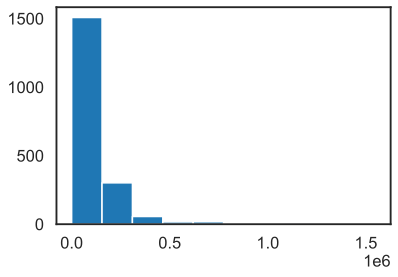

In [59]:
#check distribution

plt.hist(station_interval['INTERVAL_ENTRIES'])

In [60]:
# Busiest parts of the day by station
station_interval.sort_values(by='INTERVAL_ENTRIES', ascending=False).head(10)

,STATION,LINENAME,Num_parts_of_day,INTERVAL_ENTRIES
362,34 ST-HERALD SQ,BDFMNQRW,2,1548457.0
412,42 ST-PORT AUTH,ACENQRS1237W,0,1171675.0
1160,FLUSHING-MAIN,7,0,1169098.0
1360,JKSN HT-ROOSVLT,EFMR7,0,1084236.0
1254,GRD CNTRL-42 ST,4567S,2,1067762.0
1255,GRD CNTRL-42 ST,4567S,3,902313.0
363,34 ST-HERALD SQ,BDFMNQRW,3,901668.0
1368,JUNCTION BLVD,7,0,858909.0
430,47-50 STS ROCK,BDFM,2,845169.0
115,14 ST-UNION SQ,LNQR456W,3,817323.0


In [61]:
# PLOT THE PARTS OF THE DAY BY TOP 5 BUSIEST STATION 
# CREATING INDIVIDUAL DATAFRAMES FOR EACH STATION AND THEN APPENDING THEM 

herald_sq = station_interval[station_interval['STATION'] == '34 ST-HERALD SQ']
herald_sq.head()

,STATION,LINENAME,Num_parts_of_day,INTERVAL_ENTRIES
360,34 ST-HERALD SQ,BDFMNQRW,0,578796.0
361,34 ST-HERALD SQ,BDFMNQRW,1,757888.0
362,34 ST-HERALD SQ,BDFMNQRW,2,1548457.0
363,34 ST-HERALD SQ,BDFMNQRW,3,901668.0


In [62]:
jackson_heights = station_interval[station_interval['STATION'] == 'JKSN HT-ROOSVLT']
flushing = station_interval[station_interval['STATION'] == 'FLUSHING-MAIN']
portauthority = station_interval[station_interval['STATION'] == '42 ST-PORT AUTH']
grand_central = station_interval[station_interval['STATION'] == 'GRD CNTRL-42 ST']

In [63]:
top5_busy_times = herald_sq.append([jackson_heights, flushing, portauthority, grand_central])

In [64]:
#check dataframe
top5_busy_times.head(24)

,STATION,LINENAME,Num_parts_of_day,INTERVAL_ENTRIES
360,34 ST-HERALD SQ,BDFMNQRW,0,578796.0
361,34 ST-HERALD SQ,BDFMNQRW,1,757888.0
362,34 ST-HERALD SQ,BDFMNQRW,2,1548457.0
363,34 ST-HERALD SQ,BDFMNQRW,3,901668.0
1360,JKSN HT-ROOSVLT,EFMR7,0,1084236.0
1361,JKSN HT-ROOSVLT,EFMR7,1,661357.0
1362,JKSN HT-ROOSVLT,EFMR7,2,646582.0
1363,JKSN HT-ROOSVLT,EFMR7,3,351397.0
1160,FLUSHING-MAIN,7,0,1169098.0
1161,FLUSHING-MAIN,7,1,644419.0


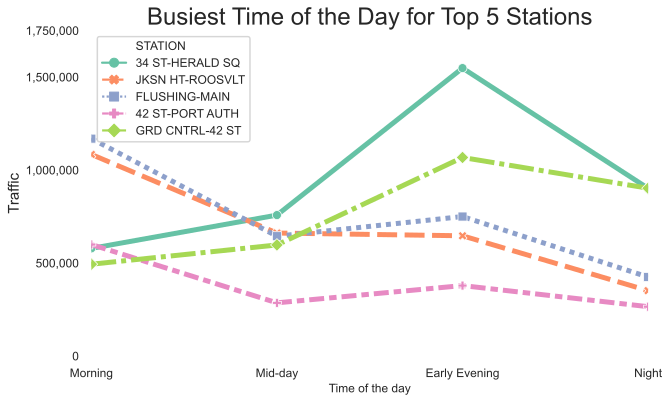

In [68]:
sns.set_style("white", {'axes.linewidth': 0.5, 'axes.edgecolor':'Gray'})
sns.set_context("talk")
plt.figure(figsize=(10,6), dpi=1200)
g=(sns.lineplot('Num_parts_of_day', 'INTERVAL_ENTRIES', hue='STATION', data=top5_busy_times, palette='Set2', 
                style='STATION', markers=True, linewidth=5, ci=None))
g.set(xlim=(0,3), xticks=[0,1,2,3])
g.set_xticklabels(['Morning', 'Mid-day', 'Early Evening', 'Night'], size=12)
plt.xlabel('Time of the day', size=12)
plt.yticks(ticks=[0, 500000, 1000000, 1500000, 1750000], labels=[0, '500,000', '1,000,000', '1,500,000', '1,750,000'], size=12)
plt.ylabel('Traffic', size=15)
plt.title('Busiest Time of the Day for Top 5 Stations', size=24)
sns.despine(bottom=True, left=True)
plt.legend(loc='upper left', fontsize=12)
fig = g.get_figure()
fig.savefig('busiest_time.png', bbox_inches='tight')

Best time to place street teams are mornings for Flushing, Jackson Heights, Port Authority and early evenings for Herald Square and Grand Central. I will look at the population of the zipcodes that the 10 busiest stations are located in and see which areas have the highest Asian populations for the street teams to have the highest impact on the AAPI community.

In [69]:
pop = pd.read_csv('Population2.csv')

In [70]:
pop.head()

,STATION,Zip Code,TOTAL POPULATION,White,Black Or African American,American Indian Or Alaskan Native,Asian,Native Hawaiian & Other Pacific Islander,Other Race,Two Or More Races
0,34 ST-HERALD SQ,10001,21102,13722,1897,75,3539,5,1063,801
1,34 ST-PENN STA,10002,21102,13722,1897,75,3539,5,1063,801
2,GRD CNTRL-42 ST,10017,16575,12503,544,15,2930,9,193,381
3,FLUSHING-MAIN,11354,54878,15375,2105,137,32240,65,3383,1573
4,42 ST-PORT AUTH,10036,24711,15736,2301,91,4224,17,1436,906


In [71]:
pop.columns

Index(['STATION', 'Zip Code', 'TOTAL POPULATION', 'White',
       ' Black Or African American', 'American Indian Or Alaskan Native',
       'Asian', 'Native Hawaiian & Other Pacific Islander', 'Other Race',
       'Two Or More Races'],
      dtype='object')

In [72]:
pop.columns = pop.columns.str.strip()

In [73]:
pop.dtypes

STATION                                     object
Zip Code                                     int64
TOTAL POPULATION                             int64
White                                        int64
Black Or African American                    int64
American Indian Or Alaskan Native            int64
Asian                                        int64
Native Hawaiian & Other Pacific Islander     int64
Other Race                                   int64
Two Or More Races                            int64
dtype: object

In [74]:
#Creating a new column for the total AAPI population
pop['AAPI'] = pop['Asian'] + pop['Native Hawaiian & Other Pacific Islander']

<Figure size 7200x4800 with 0 Axes>

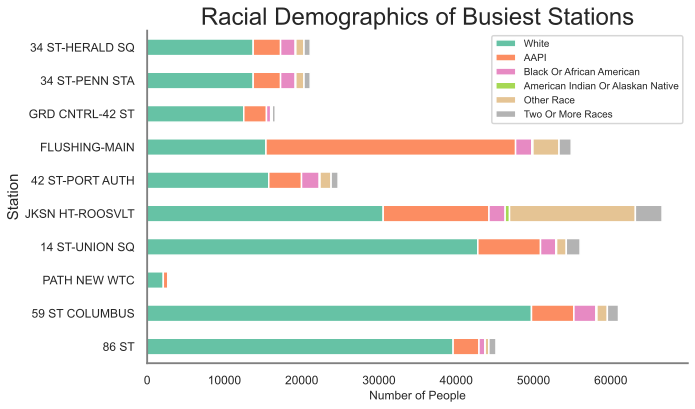

In [77]:
# Plot a stacked bar chart to show the racial demographics at each station
plt.figure(dpi=1200)
pop.plot(x='STATION', y=['White', 'AAPI', 'Black Or African American', 'American Indian Or Alaskan Native', 'Other Race', 'Two Or More Races'], 
        kind='barh', stacked=True,figsize=(10,6), colormap='Set2', fontsize=12)
plt.legend(fontsize='10',loc='upper right')
plt.xticks(size=12)
plt.xlabel('Number of People', size=12)
plt.title('Racial Demographics of Busiest Stations', size=24)
plt.ylabel('Station', size=15)
sns.despine()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('pop.png') 